# House Rocket
Empresa que possui uma plataforma de compra e venda de imoveis.


## Problema de Negócio


Encontrar bons imóveis para Maximizar o lucro da empresa.


### 0. Loading data




In [404]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import datetime as dt
import matplotlib.pyplot as plt

pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [405]:
data = pd.read_csv('kc_house_data.csv')


### 1.0 Exploring data




In [406]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00           0     0  ...      7        1180              0   
1      7242    2.00           0     0  ...      7        2170            400   
2     10000    1.00           0     0  ...      6         770              0   
3      5000    1.00           0     0  ...      7        1050            910   
4      8080    1.00           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.51 -122.26           1340        5650  
1      1951          1991    98125 47.72 -122.32           1690        7639  
2      1933             0    98028 47.74 -122.23           2720        8062  
3      1965             0    98136 47.52 -122.39           1360        5000  
4      1987             0    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

In [407]:
data.shape


(21613, 21)

In [408]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [410]:
data['date']= pd.to_datetime(data['date'],format ='%Y-%m-%d')
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [411]:
data['condition']= data['condition'].astype(int)

In [412]:
data['yr_built']= pd.to_datetime(data['yr_built'],format='%Y')
data['yr_built']

0       1955-01-01
1       1951-01-01
2       1933-01-01
3       1965-01-01
4       1987-01-01
           ...    
21608   2009-01-01
21609   2014-01-01
21610   2009-01-01
21611   2004-01-01
21612   2008-01-01
Name: yr_built, Length: 21613, dtype: datetime64[ns]

In [413]:
# vou usar a função lambda para alterar as colunas com valor 0 usando a data padrão da regra ISO e modificar o tipo. (se não for removido os 0 a coluna não se torna tipo datetime)
data['yr_renovated']= data['yr_renovated'].apply( lambda x: pd.to_datetime('1900-01-01') if x==0 else pd.to_datetime(x, format='%Y') ) 
data['yr_renovated']

0       1900-01-01
1       1991-01-01
2       1900-01-01
3       1900-01-01
4       1900-01-01
           ...    
21608   1900-01-01
21609   1900-01-01
21610   1900-01-01
21611   1900-01-01
21612   1900-01-01
Name: yr_renovated, Length: 21613, dtype: datetime64[ns]

### Business Questions

#### 1.1 How many houses are available for sale? (Quantas casas estão disponíveis para venda?)

In [414]:

houses_avaibles = data.id.nunique()
print('The number of houses avaibles for sale is {}'.format(houses_avaibles))

The number of houses avaibles for sale is 21436


#### 1.2 How many attributes does the house have? (Quantos atributos a casas possuem?)


In [415]:
# assumptions
# as colunas 'id' e 'date' não são atributos da casa.

houses_attributes_sum = data.columns.drop(['id','date'])
print('The house have {} attributes.'.format(len(houses_attributes_sum)))

The house have 19 attributes.


#### 1.3 What are the attributes? (Quais são os atributos?)

In [416]:
houses_attributes = data.columns.drop(['id','date'])
houses_attributes


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### 1.4 what is most expansive house? (Qual é a casa mais cara?)


In [417]:
data[['id','price']].sort_values('price',ascending= False).reset_index(drop=True).loc[0]['id']


6762700020.0

#### 1.5 with house has the most rooms? (Qual a casa com maior número de quartos?) 

In [418]:
house_most_rooms=data[['id','bedrooms']].sort_values('bedrooms',ascending=False).reset_index(drop=True).loc[0,'id']
print("The house with the most number rooms is {} ".format(house_most_rooms))

The house with the most number rooms is 2402100895 


#### 1.6 what is the sum total of rooms in the dataset? (Qual a soma total de quartos no conjunto de dados?)

In [419]:
data['bedrooms'].sum()

72854

#### 1.7  How many houses have two bathroom? (Quantas casas possuem 2 banheiros?)

In [420]:
houses_two_bathrooms=len(data.loc[data['bathrooms']==2,['id','bathrooms']])
print('The sum of houses with two bathrooms is {} '.format(houses_two_bathrooms))

The sum of houses with two bathrooms is 1930 


#### 1.8  what is the average price of all the houses in the dataset? (Qual o preço médio da soma total de casas do conjunto de dados?)

In [421]:
np.round(data['price'].mean(),2)


540088.14

#### 1.9 what is average price of all houses with two bathrooms? ( Qual o preço médio de todas as casas com dois banheiros?)

In [422]:
np.round(data.loc[data['bathrooms'] ==2,'price'].mean(),2)

457889.72

#### 1.10 what is the minimun price amoung the homes with three rooms? ( Qual é o preço minimo entre as casas com três quartos?)


In [423]:
data.loc[data['bedrooms']==3,'price'].min()

82000.0

#### 1.11 how many houses have more than 300 square feet of living room space? (Quantas casas possuem mais de 300 metros quadrados na sala de estar?)


In [424]:
data['m2']= data['sqft_living'] * 0.09290304
data.loc[data['m2']> 300,'id'].count()

2258

#### 1.12 how many houses have more than two floors?  (Quantas casas tem mais de dois andares?)


In [425]:
data.loc[data['floors']>2,'id'].count()

782

#### 1.13 how many houses have sea views? ( Quantas casas tem vista para o mar?)

In [426]:
len(data.loc[data['waterfront']==1])

163

#### 1.14 Of the houses with sea views, how many have three bedrooms? (Das casas com vista para o mar, quantas tem três quartos?)

In [427]:
len(data.loc[(data['waterfront']==1) & (data['bedrooms']==3), 'id'])

64

#### 1.15 of the houses with more than 300 squares feet of living room space, how many have more than two bathrooms?  (Das casas com mais de trezentos metros quadrados de espaço de sala de estar, quantas tem mais de dois banheiros?)

In [428]:
len(data.loc[(data['m2'] > 300) & (data['bathrooms']>2)])

2201

#### Qual a data do imovel mais antigo no dataset?

In [429]:
data['date'].sort_values(ascending=True).head(1)


16768   2014-05-02
Name: date, dtype: datetime64[ns]

#### Quantos imoveis possuem o numero maximo de andares.

In [430]:
data['floors'].sort_values(ascending=False)
data[data['floors']==3.5].shape

(8, 22)

#### criar uma classificação de alto e baixo padrão.

In [431]:
data['level']= "standard"

In [432]:
data.loc[data['price']>540000,'level'] = 'high_level'
data.loc[data['price']<540000,'level'] = 'low_level'
data[['price','level']].sample(15)

price       level
4764   315000.00   low_level
5301   350000.00   low_level
8432   235000.00   low_level
8633   315000.00   low_level
5936  1476000.00  high_level
6235   994000.00  high_level
2203   612000.00  high_level
6450   449950.00   low_level
4173  1191000.00  high_level
9751   500000.00   low_level
16546  227000.00   low_level
19258  981000.00  high_level
3098   200000.00   low_level
16739  554000.00  high_level
19451  269950.00   low_level

#### 1.16 Salvando relatório ordenado pelo preço

In [433]:
report = data[['id','date','price','bedrooms','sqft_lot','level']].sort_values('price',ascending= False)

In [434]:
report.head()

id       date      price  bedrooms  sqft_lot       level
7252  6762700020 2014-10-13 7700000.00         6     27600  high_level
3914  9808700762 2014-06-11 7062500.00         5     37325  high_level
9254  9208900037 2014-09-19 6885000.00         6     31374  high_level
4411  2470100110 2014-08-04 5570000.00         5     35069  high_level
1448  8907500070 2015-04-13 5350000.00         5     23985  high_level

In [435]:
#report.to_csv('C:/Users/wesle/source/repos/Projetos DS/House_Rocket/report.csv',index=False)

#### mapa

In [436]:
data_mapa = data[['id','lat','long','price']]
mapa= px.scatter_mapbox( data_mapa, lat='lat',lon='long',hover_name='id',hover_data=['price'],color_discrete_sequence=['green'],zoom=4,height=300)


In [437]:
# para dar zoom pressione o sinal de '+'
mapa.update_layout(mapbox_style='open-street-map')
mapa.update_layout(height=600, margin={'r':0,'t':0,'l':0,'b':0})
mapa.show()
mapa.write_html('C:/Users/wesle/source/repos/Projetos DS/House_Rocket/mapa.html')

#### Quais são as casas novas e as antigas?


In [438]:
data['house_age']= 'NA'
data.loc[data['date'] > '2014-01-01', 'house_age'] ='new_house'
data.loc[data['date'] < '2014-01-01', 'house_age'] ='old_house'

In [439]:
data['house_age'].unique()

array(['new_house'], dtype=object)

#### Determine os tipos de dormitorios e classique por numeros de cômodos:
- Se o valor da coluna 'bedrooms' for igual a 1 é 'studio'
- Se igual a 2 é 'apartament'
- Se maior que 2 é 'house'

In [440]:
data['dormitory_type']= data['bedrooms'].apply(lambda x: 'studio' if x == 1
                                               else 'apartament'  if x == 2
                                               else 'house' if x > 2 else 'NA')
                                               
                                               
                                                           

In [441]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [442]:
data['dormitory_type'].sample(15)

16180         house
17364         house
12203         house
6003          house
2619     apartament
16286         house
19319         house
16856    apartament
11969         house
9873          house
6923          house
2021          house
19084         house
13521         house
9169          house
Name: dormitory_type, dtype: object

#### Quero as condiçoes de investir na casa classificada como ruim, regular e bom.
- Se o valor da condicional for menor ou igual a 2 é "ruim
- Se igual 3 ou 4 é 'regular
- Se igual a 5 é 'bom

In [443]:
data['condition_type']=data['condition'].apply(lambda x: 'bad' if x <= 2
                                              else 'regular' if (x ==3) | (x == 4)
                                              else 'good')
data['condition_type'].sample(15)

115      regular
9441     regular
8055     regular
15455    regular
15209    regular
4949     regular
20314    regular
18971    regular
13403    regular
6130     regular
3919     regular
6161     regular
5192     regular
971      regular
2325     regular
Name: condition_type, dtype: object

In [444]:
data['condition'].unique()

array([3, 5, 4, 1, 2])

#### Preciso que remova as colunas "sqft_living15"e "sqft_lot15"

In [445]:
data=data.drop('sqft_living15',axis=1)
data=data.drop('sqft_lot15',axis=1)

#### Qual a data mais antiga de construção de um imovel?

In [446]:
data['yr_built'].min()

Timestamp('1900-01-01 00:00:00')

#### Qual a data mais antiga de renovação de um imovel

In [447]:
# como foi inputado manualmente o padrão 1900 ele vai retornar esse valor. 

data.loc[data['yr_renovated'] > pd.to_datetime('1900-01-01',format='%Y-%m-%d'),'yr_renovated'].min()

Timestamp('1934-01-01 00:00:00')

#### Quantos imoveis tem 2 andares?

In [448]:
data.loc[data['floors'] == 2,'id'].size

8241

#### Quantos imoveis estão na condição igual a "regular"?

In [449]:
data.loc[data['condition_type'] == 'regular','id'].size

19710

#### Quantos imoveis estão na condição igual a "bad" e possuem "vista para água" 

In [450]:
data.loc[(data['condition_type']=='bad') & (data['waterfront']== 1),'id'].size

2

In [451]:
data['waterfront'].unique()

array([0, 1], dtype=int64)

#### Quantos imoveis estão com a condição igual a 'good' e são 'new_house'


In [452]:
data.loc[(data['condition_type']=='good') & (data['house_age']=='new_house'),'id'].size

1701

#### Qual o valor mais caro do imovel de tipo "studio"

In [453]:
data.loc[data['dormitory_type'] == 'studio','price'].max()  

1247000.0

#### Quantos imoveis do tipo 'apartament' foram reformados em 2015?

In [454]:
yr_2015=data.loc[data['yr_renovated'] == pd.to_datetime('2015-01-01'),'dormitory_type'] == 'apartament'
yr_2015.sum()


0

#### Qual o maior numero de quartos que um imovel do tipo 'house' possui?

In [455]:
data.loc[data['dormitory_type'] == 'house','bedrooms'].max()

33

#### Quantos imoveis "new_house" foram reformados em 2014?



In [456]:
data.loc[(data['house_age'] == 'new_house') & (data['yr_renovated'] ==2014)].shape[0]

0

#### Selecione as colunas "id","data","price","floors","zipcode" pelo metodo:
- Direto pelo nome da coluna
- Pelos Indices
- Pelos Indices das linhas e o nome das colunas 


In [457]:
#data[['id','date','price','floors','zipcode']]

#data.iloc[:,[0,1,2,7,16]] 

#data.loc[0:10,['id','price']]



#### Salve um arquivo .csv com somente com as novas colunas criadas


In [458]:
data[['house_age','dormitory_type','condition_type']].to_csv('report_new_columns.csv')

#### Qual o número de imóveis por ano de construção?

In [459]:
data[['id','yr_built']].groupby('yr_built').count()

id
yr_built       
1900-01-01   87
1901-01-01   29
1902-01-01   27
1903-01-01   46
1904-01-01   45
...         ...
2011-01-01  130
2012-01-01  170
2013-01-01  201
2014-01-01  559
2015-01-01   38

[116 rows x 1 columns]

#### Qual o menor número de quartos por ano de construção dos imóveis?

In [460]:
data[['bedrooms','yr_built']].groupby('yr_built').min()

bedrooms
yr_built            
1900-01-01         1
1901-01-01         2
1902-01-01         2
1903-01-01         1
1904-01-01         2
...              ...
2011-01-01         1
2012-01-01         2
2013-01-01         2
2014-01-01         1
2015-01-01         1

[116 rows x 1 columns]

#### Qual o preço de compra mais alto por cada número de quartos?

In [461]:
data[['price','bedrooms']].groupby('bedrooms').max()

price
bedrooms           
0        1295650.00
1        1247000.00
2        3278000.00
3        3800000.00
4        4489000.00
5        7062500.00
6        7700000.00
7        3200000.00
8        3300000.00
9        1400000.00
10       1148000.00
11        520000.00
33        640000.00

#### Qual a soma de todos os preços de compra por cada número de quartos?

In [462]:
data[['price','bedrooms']].groupby('bedrooms').sum()

price
bedrooms              
0           5323550.00
1          63210934.00
2        1107788602.00
3        4580263939.00
4        4372957028.00
5        1259346326.00
6         224541613.00
7          36145017.00
8          14366000.00
9           5363999.00
10          2458000.00
11           520000.00
33           640000.00

#### Qual a soma de todos os preços de compra pelo número de quartos e banheiros?

In [463]:
data[['price','bedrooms','bathrooms']].groupby(['bedrooms','bathrooms']).sum()

price
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

#### Qual o tamanho médio das salas dos imóveis por ano de construção?


In [464]:
data[['sqft_living','yr_built']].groupby('yr_built').mean()

sqft_living
yr_built               
1900-01-01      1732.01
1901-01-01      1763.62
1902-01-01      1919.63
1903-01-01      1507.74
1904-01-01      1603.18
...                 ...
2011-01-01      2313.68
2012-01-01      2378.74
2013-01-01      2636.59
2014-01-01      2615.39
2015-01-01      2596.32

[116 rows x 1 columns]

#### Qual o tamanho mediano das salas dos imóveis por ano de construção?

In [465]:
data[['sqft_living','yr_built']].groupby('yr_built').median()

sqft_living
yr_built               
1900-01-01      1540.00
1901-01-01      1610.00
1902-01-01      1600.00
1903-01-01      1505.00
1904-01-01      1280.00
...                 ...
2011-01-01      2270.00
2012-01-01      2237.50
2013-01-01      2580.00
2014-01-01      2650.00
2015-01-01      2590.00

[116 rows x 1 columns]

#### Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

In [466]:
data[['sqft_living','yr_built']].groupby('yr_built').std()

sqft_living
yr_built               
1900-01-01       732.94
1901-01-01       668.23
1902-01-01       878.66
1903-01-01       469.72
1904-01-01      1076.87
...                 ...
2011-01-01       804.86
2012-01-01       771.43
2013-01-01       883.50
2014-01-01       893.81
2015-01-01      1155.61

[116 rows x 1 columns]

#### Como é o crescimento médio preços de compra dos imóveis, por dia e semana do ano?

In [467]:
data['day']= pd.to_datetime(data['date']).dt.day
by_day=data[['price','day']].groupby('day').mean().reset_index()

plt.figure(figsize=(10,5))
plt.style.use('seaborn-darkgrid')
plt.title('Média de preço dos Imóveis por dia ',fontsize=12,loc='left')
plt.plot(by_day['day'],by_day['price'])

In [468]:
data['year_week']= pd.to_datetime(data['date']).dt.strftime('%Y-%U')

by_year=data[['price','year_week']].groupby(['year_week']).mean().reset_index()
plt.figure(figsize=(20,12))
plt.style.use('seaborn-darkgrid')
plt.title('Média de preço dos Imóveis por semana do ano',fontsize=12,loc='left')
plt.plot(by_year['year_week'],by_year['price'])
plt.xticks(rotation=45);

<BarContainer object of 2 artists>

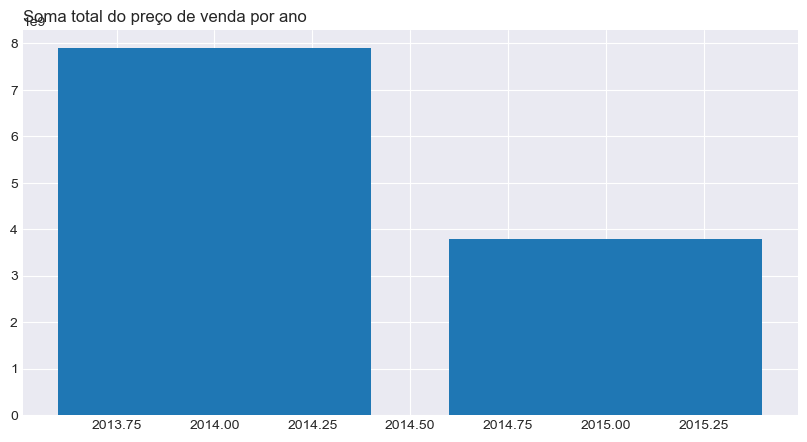

In [469]:
data['year']= pd.to_datetime(data['date']).dt.year
by_year=data[['price','year']].groupby('year').sum().reset_index()

plt.figure(figsize=(10,5))
plt.title('Soma total do preço de venda por ano',fontsize=12,loc='left')
plt.bar(by_year['year'],by_year['price'])

<BarContainer object of 2 artists>

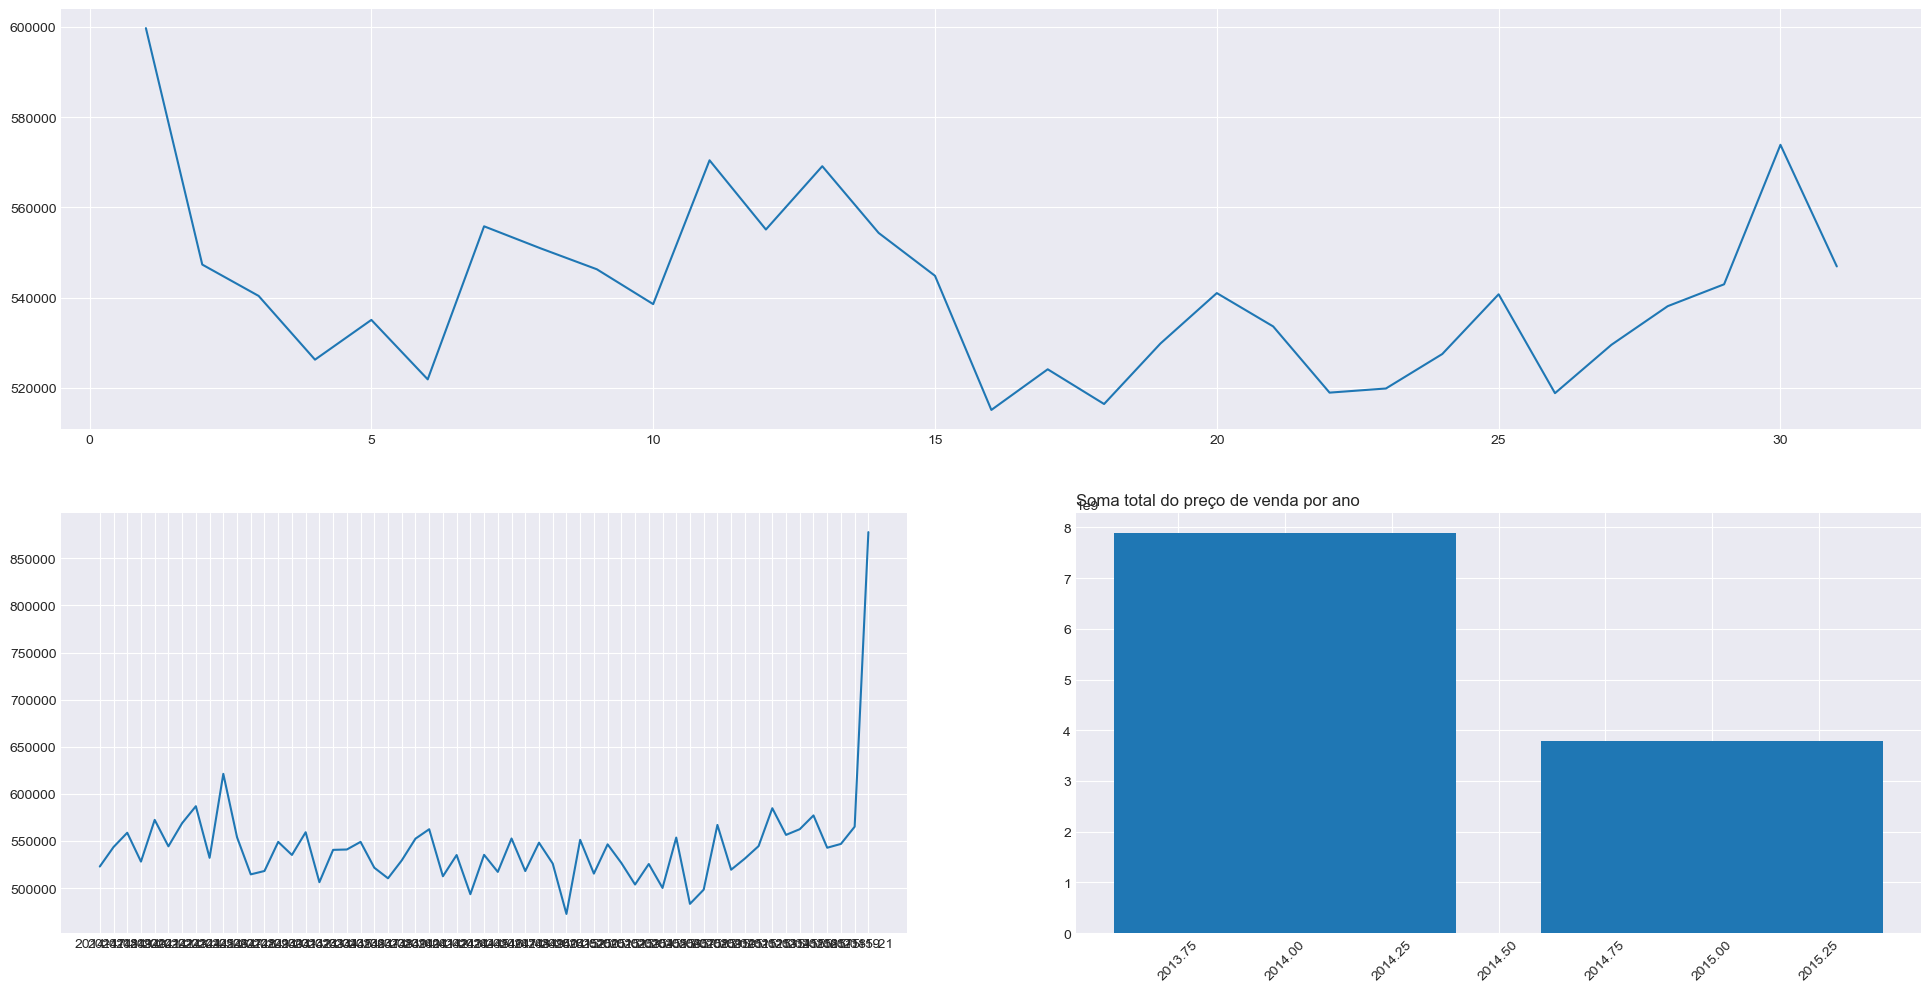

In [470]:
from matplotlib import gridspec
fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )
ax1 = fig.add_subplot( specs[0, :] ) # First Row
ax2 = fig.add_subplot( specs[1, 0] ) # First Row First Column
ax3 = fig.add_subplot( specs[1, 1] ) # Second Row First Column

# Graph day
data['day']= pd.to_datetime(data['date']).dt.day
by_day=data[['price','day']].groupby('day').mean().reset_index()


plt.style.use('seaborn-darkgrid')
plt.title('Média de preço dos Imóveis por dia ',fontsize=12,loc='left')
ax1.plot(by_day['day'],by_day['price'])

#Graph year_week
data['year_week']= pd.to_datetime(data['date']).dt.strftime('%Y-%U')

by_year=data[['price','year_week']].groupby(['year_week']).mean().reset_index()

plt.style.use('seaborn-darkgrid')
plt.title('Média de preço dos Imóveis por semana do ano',fontsize=12,loc='left')
plt.xticks(rotation=45);
ax2.plot(by_year['year_week'],by_year['price'])


#Graph year
data['year']= pd.to_datetime(data['date']).dt.year
by_year=data[['price','year']].groupby('year').sum().reset_index()


plt.title('Soma total do preço de venda por ano',fontsize=12,loc='left')
ax3.bar(by_year['year'],by_year['price'])

#### Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

In [471]:
#houses = data[['id','lat', 'long', 'price']]

#fig = px.scatter_mapbox( houses,
#lat="lat",
#lon="long",
#size='price',                       
#color_continuous_scale=px.colors.cyclical.IceFire,
#size_max=15,
#zoom=10)
#fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()                                        
                                        

#### Crie uma nova coluna chamada: “dormitory_type”
- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
- Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [472]:
data[['dormitory_type','bedrooms']]

dormitory_type  bedrooms
0              house         3
1              house         3
2         apartament         2
3              house         4
4              house         3
...              ...       ...
21608          house         3
21609          house         4
21610     apartament         2
21611          house         3
21612     apartament         2

[21613 rows x 2 columns]

#### Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

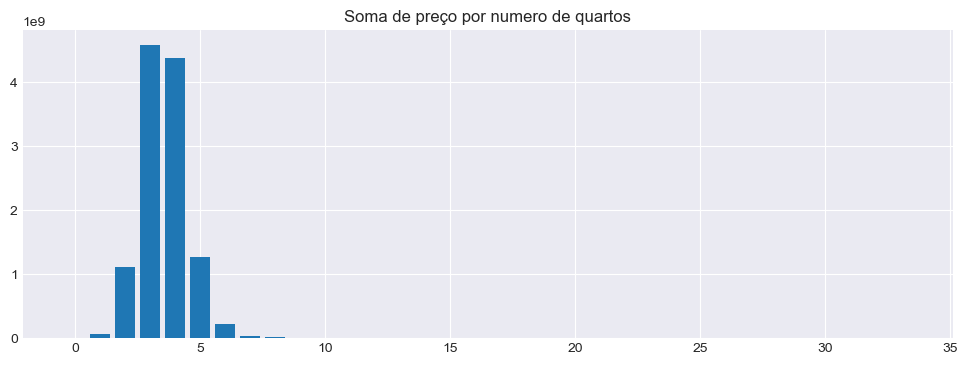

In [473]:
price_by_bedrooms=data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()

plt.figure(figsize=(12,4))
plt.bar(price_by_bedrooms['bedrooms'],price_by_bedrooms['price'])
plt.title('Soma de preço por numero de quartos',fontsize=12,loc='center')
plt.show()

#### Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis

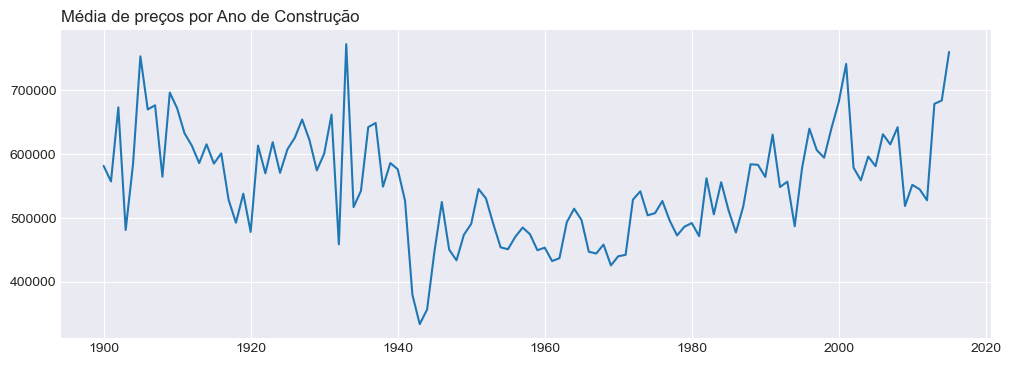

In [474]:
by_yr_built=data[['price','yr_built']].groupby('yr_built').mean().reset_index()

plt.figure(figsize=(12,4))
plt.style.use('seaborn-darkgrid')
plt.title('Média de preços por Ano de Construção',fontsize=12,loc='left')
plt.plot(by_yr_built['yr_built'],by_yr_built['price'])
plt.show()

#### Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

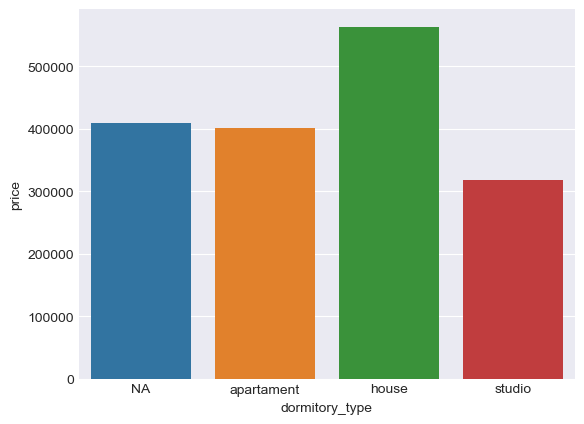

In [475]:
by_dormitory_type = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()

sns.barplot(x='dormitory_type',y='price',data=by_dormitory_type)


#### Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930

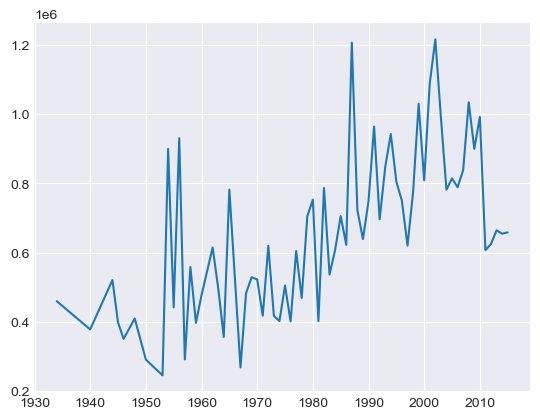

In [476]:
by_yr_renovated= data.loc[data['yr_renovated']> pd.to_datetime('1930'),['price','yr_renovated']].groupby(['yr_renovated']).mean().reset_index()
plt.plot(by_yr_renovated['yr_renovated'],by_yr_renovated['price'])
plt.show()


In [477]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'm2', 'level', 'house_age', 'dormitory_type',
       'condition_type', 'day', 'year_week', 'year'],
      dtype='object')

#### Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis

In [478]:
data[['price','yr_built','dormitory_type']].groupby(['yr_built','dormitory_type']).mean().reset_index()

yr_built dormitory_type     price
0   1900-01-01     apartament 589533.33
1   1900-01-01          house 584854.27
2   1900-01-01         studio 398944.00
3   1901-01-01     apartament 452856.40
4   1901-01-01          house 578619.17
..         ...            ...       ...
309 2014-01-01          house 692687.72
310 2014-01-01         studio 516500.00
311 2015-01-01     apartament 543250.00
312 2015-01-01          house 797383.06
313 2015-01-01         studio 385195.00

[314 rows x 3 columns]

#### Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )

#### Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas 

#### Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [479]:
house = data[['id','lat', 'long', 'sqft_living']]
fig = px.scatter_mapbox( house,
lat='lat',
lon='long',
hover_name='id',
hover_data=['sqft_living'],
color_discrete_sequence=['green'],
zoom=4,
height=300)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()                                        
            

##### Qual a quantidade de imóveis por nivel?
- Nivel 0: Preço entre 0.00 e  321.950
- Nível 1 -> Preço en 321.950 e 450.000
- Nível 2 -> Preço entre 450.000 e 645.000
- Nível 3 -> Acima de 645.00

In [480]:

for i in range(len(data)):
    if (data.loc[i,'price']> 0) & (data.loc[i,'price']< 321950):
        data.loc[i,'level_price'] = 'level_0'
        
    elif (data.loc[i,'price']>=321.950) & (data.loc[i,'price']<450000):
        data.loc[i,'level_price']= 'level_1'
        
    elif (data.loc[i,'price'] >=450000) & (data.loc[i,'price']< 645000):
        data.loc[i,'level_price']='level_2'
        
    else:
        data.loc[i,'level_price']= 'level_3'
    
    

#### . Adicione as seguintes informações ao imóvel:
- O nome da Rua
- O número do Imóvel
- O nome do Bairro
- O nome da Cidade
- O nome da Estado